# Read PMID data

In [1]:
import numpy as np
import pandas as pd

pmids_test_unlabeled=pd.read_csv("data/pmids_test_set_unlabeled.txt", sep='\s+', header=None)
#print(pmids_test_unlabeled)



# Getting training data from results

In [2]:
import json
import pandas as pd
from pandas.io.json import json_normalize

test_data=pd.DataFrame(columns=['sourceid','text','denotations'])
with open('data/test.json','r') as ipfile:
    publications=json.load(ipfile)
#print(publications)
for i, pub in enumerate(publications.values()):
    test_denotations=[d['obj'] for d in pub['denotations']]
    test_data.loc[i]=[pub['sourceid'],pub['text'], test_denotations]
#print(train_data['text'][1])

test_text=' '.join(test_data['text'])
#print(train_text)
#print(train_data['denotations'])
def denotation_label(denotations):
    diseases=list()
    for rec in denotations:
        #print(rec)
        count_obj=dict()
        if rec:
            for item in rec:
                
                if item in count_obj: count_obj[item]+=1
                else: count_obj[item]=1
            diseases.append(max(count_obj, key=lambda key:count_obj[key]))
        else:
            diseases.append("")
    return diseases
denotation=denotation_label(test_data['denotations'])
denotation
print(test_data['denotations'])

0     [Disease:D014424, Disease:D014424, Disease:D03...
1     [Disease:D008382, Disease:D030342, Disease:D00...
2     [Disease:D015179, Disease:D006316, Disease:D01...
3     [Disease:C536928, Disease:D003123, Disease:D03...
4     [Disease:D008382, Disease:D003240, Disease:D00...
5     [Disease:D008382, Disease:D008382, Disease:D00...
6     [Disease:C537846, Disease:D030342, Disease:C53...
7     [Disease:D014424, Disease:D014424, Disease:D00...
8     [Disease:D008382, Disease:D008382, Disease:D03...
9     [Disease:D008382, Disease:D008382, Disease:D00...
10    [Disease:D014424, Disease:D014424, Disease:D01...
11    [Disease:D003635, Disease:D003635, Disease:D00...
12    [Disease:D014424, Disease:D014424, Disease:D00...
13    [Disease:D008382, Disease:D008382, Disease:D00...
14    [Disease:D015179, Disease:D015179, Disease:D01...
15    [Disease:D008382, Disease:D008382, Disease:D00...
16    [Disease:D014424, Disease:D014424, Disease:D01...
17    [Disease:D008175, Disease:D008175, Disease

# Training text wordcloud

In [3]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

#Add more words to ignore 
stopwords.update(["patient","Patient","treatment", "risk", "case", "may"])

# Create stopword list:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

#Generate wordcloud data
wordcloud = WordCloud(stopwords=stopwords, max_words=25, \
                      background_color="white").generate(test_text)

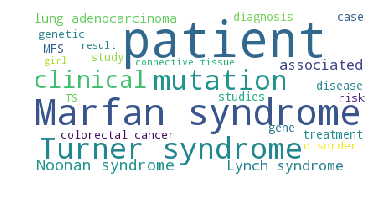

In [4]:
import matplotlib.pyplot as mpLib
mpLib.imshow(wordcloud)
mpLib.axis("off")
mpLib.show()

# Preprocess train

In [6]:
#nlp processing on text

from numpy import array
import re
import pandas as pd

from nltk import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk import bigrams
from nltk.corpus import stopwords
from nltk import pos_tag

def preprocess_text(text):

    #Get rid of punctuations
    tokenizer=RegexpTokenizer(r'\w+')
    tokens=tokenizer.tokenize(text)

    stop_words=[s.lower() for s in stopwords.words('english')]
    
    #get list to rid irrelevant most frequent words
    other_words= ["patient","patient's","treatment","case","clinical","result"]

    tokens=[word.lower().strip() for word in tokens]

    #get rid of stopwords
    tokens=[word.strip().lower() for word in tokens if word.strip() and word.strip().lower() not in stop_words ]
    tokens = [word for word in tokens if word not in other_words]


    #lemmetize the text
    wnl=WordNetLemmatizer()
    tokens=[wnl.lemmatize(word) for word in tokens]

    #tokens=bigrams(tokens)

    #form the string back
    return(tokens)
    
    
# queries: column of queries
test_text_p=""
result= list()
t_list=list()
processed=" "
for text in test_data['text']:
    tokens=preprocess_text(text)
    article=' '.join(tokens)
    #__import__('PorterStemmer',fromlist='nltk')
    test_text= test_text + " " + article
    result.append(article)
    t_list.append(list(tokens))
#tokens=[word for word in tokenizer.tokenize(result)]
print(t_list)
NNS=list()
for token_list in t_list:
    NNS.append(' '.join([w[0] for w in pos_tag(token_list) if w[1]=='NN']))
print(NNS)

[['turner', 'syndrome', 'care', 'birth', 'late', 'adolescence', 'turner', 'syndrome', 't', 'genetic', 'condition', 'occurring', 'female', 'resulting', 'loss', 'part', 'one', 'x', 'chromosome', 'two', 'hallmark', 'feature', 'turner', 'syndrome', 'include', 'short', 'stature', 'primary', 'ovarian', 'insufficiency', 'addition', 'turner', 'syndrome', 'involve', 'multiple', 'healthcare', 'issue', 'including', 'cardiac', 'renal', 'anomaly', 'autoimmune', 'disorder', 'hearing', 'loss', 'ophthalmologic', 'issue', 'bone', 'anomaly', 'dermatologic', 'issue', 'psychosocial', 'educational', 'concern', 'presenting', 'sign', 'turner', 'syndrome', 'vary', 'markedly', 'leading', 'delayed', 'even', 'missed', 'diagnosis', 'early', 'identification', 't', 'allows', 'appropriate', 'screening', 'surveillance', 'evaluation', 'timely', 'intervention', 'article', 'provide', 'overview', 'healthcare', 'issue', 'common', 'patient', 't', 'treatment', 'available', 'screening', 'surveillance', 'testing', 'recommende

['turner syndrome care birth adolescence turner t condition loss part chromosome hallmark feature stature insufficiency addition turner involve multiple issue anomaly autoimmune disorder hearing loss issue bone issue concern sign turner vary diagnosis identification t surveillance evaluation article overview issue t treatment surveillance testing', 'dysregulation tgf beta activation pathogenesis marfan marfan syndrome disorder tissue mutation fibrillin fbn1 fbn1 mouse component extracellular marfan airspace enlargement lung rupture pneumothorax pathogenesis emphysema lung phenotype mouse deficient fibrillin model marfan lung abnormality period impairment septation fibrillin develop emphysema view perturbation predispose onset show mouse deficient fibrillin dysregulation growth factor beta tgf beta activation apoptosis antagonism tgf beta apoptosis rescue septation vivo sequestration cytokine activation perturbation function contribute pathogenesis disease', 'role instability diagnosis 

In [7]:
#group your Xs and Ys

X=NNS
Y=denotation


In [8]:
#Do TF-IDF conversion of hashtags
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
hash_matrix=vectorizer.fit_transform(X)
print("\n Feature names Identified :\n")
print(vectorizer.get_feature_names())


 Feature names Identified :

['a549', 'aaa', 'ab', 'ability', 'abnormality', 'absence', 'access', 'account', 'accumulation', 'acid', 'acinar', 'activation', 'activity', 'acute', 'addition', 'address', 'adenocarcinoma', 'adolescence', 'adult', 'adulthood', 'advance', 'advancement', 'age', 'agent', 'agreement', 'aim', 'air', 'airspace', 'airway', 'algorithm', 'alteration', 'ameliorate', 'amino', 'amplification', 'anagen', 'analysis', 'anesthesia', 'anesthesiologist', 'aneurysm', 'angiography', 'angiotensin', 'animal', 'anomaly', 'answer', 'antagonism', 'antagonist', 'anti', 'antibody', 'antisense', 'antitumor', 'anxiety', 'aorta', 'apoptosis', 'approach', 'april', 'arch', 'area', 'arise', 'arisen', 'array', 'article', 'as1', 'ascertain', 'aspecific', 'aspect', 'ass', 'assembly', 'assessment', 'association', 'at1r', 'attention', 'auc', 'authority', 'autoimmune', 'autoimmunity', 'availability', 'avenue', 'awareness', 'background', 'basis', 'bdi', 'bearing', 'beck', 'beginning', 'belgium',

# Find optimal cluster size using elbow method

Sum of squared distances :  [71.37523489017565, 68.09784435039025, 65.5540613673571, 63.59510018982317, 61.918932828697294, 60.53536311213946, 58.87198272801053, 57.2371497152013, 56.55155929443772, 55.06213682430571, 53.99033714558884, 52.61631736176738, 51.39640092148359, 50.538652439604135]


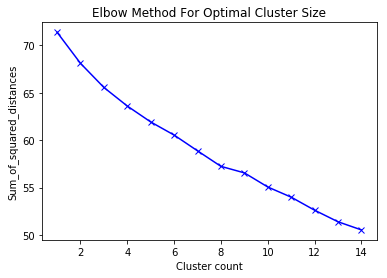

In [10]:
#Find optimal cluster size by finding sum-of-squared-distances
#Use KMeans clustering from scikit-learn
from sklearn.cluster import KMeans


sosd = []
#Run clustering for sizes 1 to 15 and capture inertia
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(hash_matrix)
    sosd.append(km.inertia_)
    
print("Sum of squared distances : " ,sosd)

#Plot sosd against number of clusters
import matplotlib.pyplot as mpLib
mpLib.plot(K, sosd, 'bx-')
mpLib.xlabel('Cluster count')
mpLib.ylabel('Sum_of_squared_distances')
mpLib.title('Elbow Method For Optimal Cluster Size')
mpLib.show()

# Cluster using K-Means++

In [12]:

#Use KMeans clustering from scikit-learn
from sklearn.cluster import KMeans

#Split data into 3 clusters
kmeans = KMeans(n_clusters=6).fit(hash_matrix)

#get Cluster labels.
clusters=kmeans.labels_

#Print cluster label and Courses under each cluster
for group in set(clusters):
    print("\nGroup : ",group, "\n-------------------")
    
    for i in range(len(NNS)):
        if ( clusters[i] == group):
            print(test_data['sourceid'][i])
            print(test_data['denotations'][i])


Group :  0 
-------------------
28699072
['Disease:D015179', 'Disease:D006316', 'Disease:D015179', 'Disease:C538322', 'Disease:D015179', 'Disease:D009369', 'Disease:D003123', 'Disease:D015179', 'Disease:D003123', 'Disease:D009386', 'Disease:D015179', 'Disease:D015179', 'Disease:D015179', 'Disease:C538322', 'Disease:D009369', 'Disease:D015179', 'Gene:4292', 'Gene:4436', 'Gene:2956', 'Gene:5395', 'Gene:5928', 'Gene:5928', 'Gene:5928', 'Gene:5928']
26895074
['Disease:C536928', 'Disease:D003123', 'Disease:D030342', 'Disease:D053842', 'Disease:D053842', 'Disease:D009369', 'Disease:D014591', 'Disease:D009369', 'Disease:C536928', 'Disease:D053842', 'Disease:D003123', 'Disease:D003123', 'Disease:D003123', 'Disease:C536928', 'Disease:D003123', 'Gene:4292', 'Gene:5395', 'Gene:4436', 'Gene:2956', 'Gene:4072']
28696559
['Disease:D015179', 'Disease:D015179', 'Disease:D015179', 'Disease:D015179', 'Disease:D003123', 'Disease:D009369', 'Disease:D015179', 'Disease:D015179', 'Disease:D009369', 'Disease